## **回帰分析（regression）とは**
統計学において、連続尺度の従属変数（目的変数）Y と独立変数（説明変数）X の間にモデルを当てはめること。X が1次元ならば単回帰、X が2次元以上ならば重回帰と言う。（wikipedia）
### 正規方程式の簡単な導出
残差平方和
$$f(a) = \sum_{j=1}^{m}(y_j-\sum_{i=1}^{n}a_i x_{ji})^2\tag{1}$$
を最小にするaを求める

fは{$a_1,…,a_n$}の二次の関数になるため，f(a)を{$a_1,…,a_n$}のそれぞれで偏微分した結果
$$\frac{∂f}{∂a_k}=-2\sum_{j=1}^{m}x_{j,k}(y_j-\sum_{i=1}^{n}a_ix_{ji})\tag{2}　(kは1≤k≤nを満たす整数) $$

がすべて0になるときf(a)は最小値をとる

(2)の右辺=0としてなんやかんやすると
$$X^Ty=X^TXa$$
つまり
$$a = (X^TX)^{-1}X^Ty      （正規方程式）$$


## **sklearn未使用**

In [39]:
import numpy as np
import pandas as pd
boston = load_boston()
model = linear_model.LinearRegression()

X = boston.data
y = boston.target
print(X.shape)
y = y.reshape(506,1)

#X = np.array([[5.5,12,6],[4.5,9,9],[4.1,8,6],[3.5,6,2],[2.5,5,8],[2.3,6,7],[2.7,5,2],[2.8,4,9]])
#y = np.array([[73],[59],[56],[31],[28],[31],[30],[25]])

(506, 13)


In [41]:
import statsmodels.api as sm 
X = sm.add_constant(X)

#正規方程式を計算
a = np.linalg.pinv(X.T @ X) @ X.T @ y

#それぞれ、切片、x1の項、x2...
print(a.T)

[[ 3.64594884e+01 -1.08011358e-01  4.64204584e-02  2.05586264e-02
   2.68673382e+00 -1.77666112e+01  3.80986521e+00  6.92224641e-04
  -1.47556685e+00  3.06049479e-01 -1.23345939e-02 -9.52747232e-01
   9.31168327e-03 -5.24758378e-01]]


## **sklearn使用**

In [45]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.datasets import load_boston

boston = load_boston()
model = linear_model.LinearRegression()

X = boston.data
y = boston.target

model.fit(X,y)

pred_y = model.predict(X)

print(f"切片：{model.intercept_}")
print(f"回帰係数：{model.coef_}")

切片：36.459488385090125
回帰係数：[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]


No handles with labels found to put in legend.


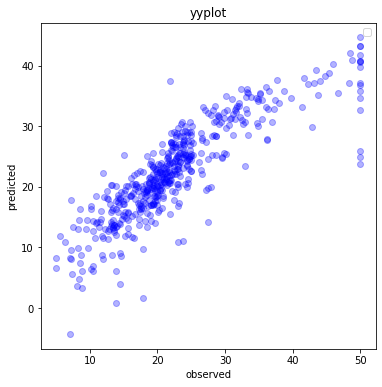

In [50]:
#グラフ
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(y, pred_y,color='blue',alpha=0.3)
plt.xlabel('observed')
plt.ylabel('predicted')
plt.legend(loc='best')
plt.title('yyplot')
plt.show()
